In [3]:
import os, sys
sys.path.insert(0, os.path.abspath('..'))  # add project root to sys.path

# Change to project root directory so relative paths work
os.chdir('..')

from markov_agent_chain import MarkovAgentChain, load_agents_for_chain
from simulation_engine.simulation import Simulation

In [4]:
agent_names = ["rowan_greenwood", "jasmine_carter", "mina_kim", "kemi_adebayo", "pema_sherpa", "carlos_mendez", "bianca_silva", "mei_chen"]
simulation = Simulation(agent_names=agent_names)
simulation.run_full_simulation(total_steps=6, weight_update_cycle=3, production_cycle=30, testing_mode=False)

Created output directory: output
=== Starting Full Agent Simulation ===
Loading agents for simulation...
Loaded rowan_greenwood:Synthetic
Loaded: Rowan Greenwood
Loaded jasmine_carter:Synthetic
Loaded: Jasmine Carter
Loaded mina_kim:Synthetic
Loaded: Mina Kim
Loaded kemi_adebayo:Synthetic
Loaded: Kemi Adebayo
Loaded pema_sherpa:Synthetic
Loaded: Pema Sherpa
Loaded carlos_mendez:Synthetic
Loaded: Carlos Mendez
Loaded bianca_silva:Synthetic
Loaded: Bianca Silva
Loaded mei_chen:Synthetic
Loaded: Mei Chen
Successfully loaded 8 agents
=== Phase 1: Initialize Uniform Network Weights ===
Initializing uniform network weights...
  Rowan Greenwood: uniform weights (0.143) for 7 connections
  Jasmine Carter: uniform weights (0.143) for 7 connections
  Mina Kim: uniform weights (0.143) for 7 connections
  Kemi Adebayo: uniform weights (0.143) for 7 connections
  Pema Sherpa: uniform weights (0.143) for 7 connections
  Carlos Mendez: uniform weights (0.143) for 7 connections
  Bianca Silva: uniform

{'total_steps': 6,
 'agents': [<generative_agent.generative_agent.GenerativeAgent at 0x31adc1790>,
 'final_network_weights': {'Rowan Greenwood': {'Jasmine Carter': 0.15689812270060183,
   'Mina Kim': 0.15689812270060183,
   'Kemi Adebayo': 0.0861075154193986,
   'Pema Sherpa': 0.23406449445830826,
   'Carlos Mendez': 0.12845731815518535,
   'Bianca Silva': 0.23406449445830826,
   'Mei Chen': 0.0035099321075958393},
  'Jasmine Carter': {'Rowan Greenwood': 0.22128584121474043,
   'Mina Kim': 0.22128584121474043,
   'Kemi Adebayo': 0.14833233527009998,
   'Pema Sherpa': 0.0033183088312196724,
   'Carlos Mendez': 0.0033183088312196724,
   'Bianca Silva': 0.22128584121474043,
   'Mei Chen': 0.18117352342323917},
  'Mina Kim': {'Rowan Greenwood': 0.21743523929110475,
   'Jasmine Carter': 0.2655760009913719,
   'Kemi Adebayo': 0.1780209172104974,
   'Pema Sherpa': 0.004864194131672079,
   'Carlos Mendez': 0.004864194131672079,
   'Bianca Silva': 0.3243752601120096,
   'Mei Chen': 0.0048641941

In [ ]:
results['interaction_history']
# Save results to a json file
import json
with open('markov_agents_results_v4_120.json', 'w') as f:
    json.dump(results, f)

In [ ]:
def test_markov_chain_simulation(testing_mode=True, refletion_prob=0.2):
  """
  Run Markov chain simulation where each agent is a state.
  State transitions i→i trigger reflections, i→j trigger conversations.
  """
  print("=== Markov Agent Chain Simulation ===")
  
  # Load agents for the chain
  agent_names = ["rowan_greenwood", "jasmine_carter", "mina_kim", "kemi_adebayo", "pema_sherpa", "carlos_mendez", "bianca_silva", "mei_chen"]
  agents = load_agents_for_chain("Synthetic", agent_names)
  
  if len(agents) < 2:
    print("Error: Could not load required agents")
    return None
  
  # Build transition matrix based on learned buying interest
  print("Building transition matrix from agent buying interests...")
  transition_matrix = []
  agent_full_names = [agent.scratch.get_fullname() for agent in agents]
  
  for i, agent in enumerate(agents):
    agent_name = agent.scratch.get_fullname()
    other_agents = [name for j, name in enumerate(agent_full_names) if j != i]
    
    try:
      # Get buying interest probabilities for this agent
      interest_probs = agent.get_markov_buying_interest_scores(other_agents)
      print(interest_probs)
      # Create transition row for this agent
      row = []
      print(row)
      for j, target_name in enumerate(agent_full_names):
        if i == j:
          # Self-transition (reflection)
          row.append(refletion_prob)
        else:
          # Transition to other agent - scale buying interest by 70%
          buying_interest = interest_probs.get(target_name, 1.0 / len(other_agents))
          row.append(buying_interest * (1 - refletion_prob))
      
      transition_matrix.append(row)
      print(f"{agent_name}: self={row[i]:.3f}, others={[f'{row[j]:.3f}' for j in range(len(row)) if j != i]}")
      
    except Exception as e:
      print(f"Error getting interests for {agent_name}: {e}")
      # Fallback to uniform distribution
      uniform_prob = (1 - refletion_prob) / (len(agents) - 1)
      row = [refletion_prob if j == i else uniform_prob for j in range(len(agents))]
      transition_matrix.append(row)
  
  # Create Markov chain and run simulation with learned transition matrix
  chain = MarkovAgentChain()
  
  results = chain.run_markov_chain(
    agents=agents,
    context="Local community market and social interactions",
    num_steps=10,
    transition_matrix=transition_matrix,  # Use learned transition matrix
    conversation_max_turns=8,
    testing_mode=testing_mode
  )
  
  print("=== Simulation Results ===")
  print(f"Total conversations: {results['conversation_count']}")
  print(f"Total reflections: {results['reflection_count']}")
  print(f"Final agent state: {results['final_agent']}")
  
  return results

In [4]:
results = test_markov_chain_simulation(testing_mode=False)

=== Markov Agent Chain Simulation ===
Loaded rowan_greenwood:Synthetic
Loaded: Rowan Greenwood
Loaded jasmine_carter:Synthetic
Loaded: Jasmine Carter
Loaded mina_kim:Synthetic
Loaded: Mina Kim
Loaded kemi_adebayo:Synthetic
Loaded: Kemi Adebayo
Loaded pema_sherpa:Synthetic
Loaded: Pema Sherpa
Loaded carlos_mendez:Synthetic
Loaded: Carlos Mendez
Loaded bianca_silva:Synthetic
Loaded: Bianca Silva
Loaded mei_chen:Synthetic
Loaded: Mei Chen
Building transition matrix from agent buying interests...
{'Jasmine Carter': 0.019723405084000167, 'Mina Kim': 0.019723405084000167, 'Kemi Adebayo': 0.019723405084000167, 'Pema Sherpa': 0.019723405084000167, 'Carlos Mendez': 0.8816595694959991, 'Bianca Silva': 0.019723405084000167, 'Mei Chen': 0.019723405084000167}
[]
Rowan Greenwood: self=0.200, others=['0.016', '0.016', '0.016', '0.016', '0.705', '0.016', '0.016']
{'Rowan Greenwood': 0.14285714285714285, 'Mina Kim': 0.14285714285714285, 'Kemi Adebayo': 0.14285714285714285, 'Pema Sherpa': 0.142857142857

In [2]:
from generative_agent.generative_agent import *

curr_agent = GenerativeAgent("Synthetic", "mei_chen")
plans = curr_agent.create_production_plans_for_recent_sales(time_step=0, max_items=5)
print(plans)
# print(f"=== Production Planning Demo for {curr_agent.scratch.get_fullname()} ===")
# plan_dict = curr_agent.create_production_plan("silk_scarves", time_step=0)
# if plan_dict:
#   print(f"Plan created: {plan_dict['planned_quantity']} units to produce")
#   print(f"Reasoning: {plan_dict['reasoning'][:100]}...")
#   print()

Loaded mei_chen:Synthetic
Creating production plans for 2 items based on recent sales:
  - silk_care_kit
  - silk_scarves

Sales history:  [{'record_id': 14, 'action': 'sell_item', 'item_name': 'silk_care_kit', 'quantity': 1, 'time_step': 3, 'description': 'Sold 1 silk_care_kit to Jasmine Carter for $55.0', 'trade_partner': 'Jasmine Carter'}]
Prompt:  You are Mei Chen, an experienced business person planning production.

Financial situation:
- Available cash: $456.25
- Production cost per unit of silk_care_kit: $13.75

Current business status:
- Item to plan: silk_care_kit
- Current inventory: 14 units
- Recent sales: 1 recent sales
- Relevant memories: Mei developed a silk care kit with instructions in multiple languages, helping international customers preserve their purchases properly.; Jasmine visited Silk Heritage with a thoughtful eye for longevity. I guided her to our earthy-toned hand-finished scarves, and the deep river green spoke to her; she also chose the silk care kit to h

In [4]:
results['interaction_history']
# Save results to a json file
import json
with open('markov_agents_results_v4_120.json', 'w') as f:
    json.dump(results, f)

In [24]:
# open results.json
import json
with open('markov_agents_results_v4_120.json', 'r') as f:
    results = json.load(f)

results['interaction_history']

[{'type': 'reflection',
  'step': 1,
  'agent': 'Rowan Greenwood',
  'anchor': 'recent interactions and experiences in Local community market and social interactions'},
 {'type': 'conversation',
  'step': 2,
  'participants': ['Rowan Greenwood', 'Mina Kim'],
  'context': 'Local community market and social interactions',
  'dialogue': [['Rowan Greenwood',
    'Morning. The air’s got that piney chill—good drying weather. If you’re browsing, I’ve jars of herbal tea and a brisk black tea today, plus a few medicinal cannabis tins. The herbal blend leans floral with a minty lift; the black is sturdy and slightly malty. No rush—listen to your body and your nose. If something calls to you, just tap your digital cash on my little machine and I’ll wrap it snug. Otherwise, you’re welcome to just take in the scents.'],
   ['Mina Kim',
    'Oh, hi... the piney air does feel really nice. I think I might just smell a couple, if that’s okay. The herbal one sounds lovely—floral with mint always makes m

Ordered transitions (step: from → to, kind):
1: Rowan Greenwood → Rowan Greenwood (reflection)
2: Rowan Greenwood → Mina Kim (conversation)
3: Mina Kim → Mina Kim (reflection)
4: Mina Kim → Mei Chen (conversation)
5: Mei Chen → Jasmine Carter (conversation)
6: Jasmine Carter → Carlos Mendez (conversation)
7: Carlos Mendez → Carlos Mendez (reflection)
8: Carlos Mendez → Carlos Mendez (reflection)
9: Carlos Mendez → Jasmine Carter (conversation)
10: Jasmine Carter → Bianca Silva (conversation)
11: Bianca Silva → Pema Sherpa (conversation)
12: Pema Sherpa → Jasmine Carter (conversation)
13: Jasmine Carter → Rowan Greenwood (conversation)
14: Rowan Greenwood → Mei Chen (conversation)
15: Mei Chen → Mei Chen (reflection)
16: Mei Chen → Mina Kim (conversation)
17: Mina Kim → Kemi Adebayo (conversation)
18: Kemi Adebayo → Pema Sherpa (conversation)
19: Pema Sherpa → Bianca Silva (conversation)
20: Bianca Silva → Jasmine Carter (conversation)
21: Jasmine Carter → Kemi Adebayo (conversation)
22

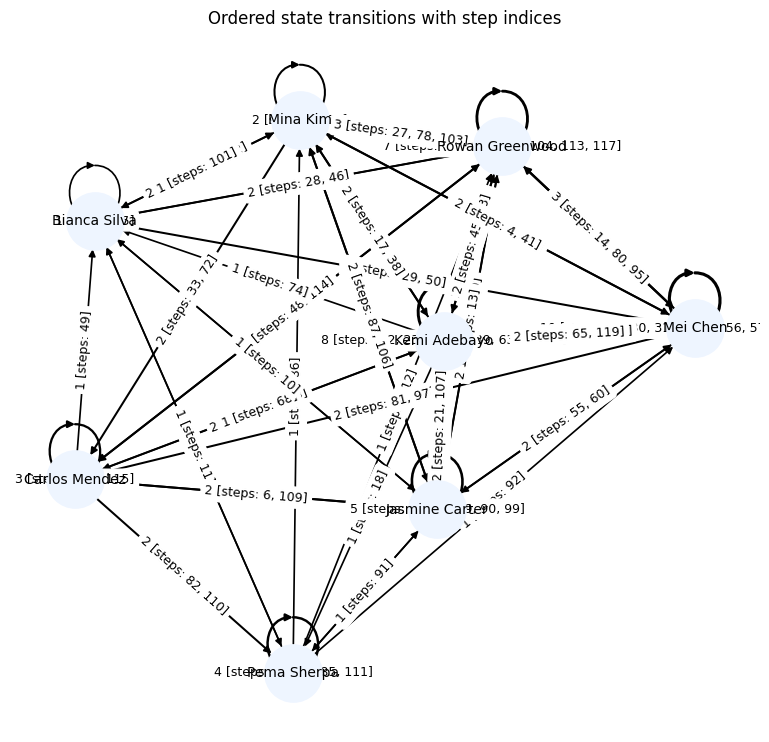

In [25]:
# Ordered Markov state transitions (by step) and flow graph with step labels
import math
import matplotlib.pyplot as plt

try:
  import networkx as nx
except ImportError:
  import sys, subprocess
  subprocess.check_call([sys.executable, "-m", "pip", "install", "networkx==3.2.1"])  # safety
  import networkx as nx

blocks = results.get('interaction_history', []) if isinstance(results, dict) else []
if not blocks:
  print("No interaction_history found in results.")
else:
  # Build ordered transitions list from history
  ordered = []
  for b in sorted(blocks, key=lambda x: x.get('step', 0)):
    if b.get('type') == 'conversation':
      participants = b.get('participants', [])
      if len(participants) == 2:
        ordered.append({'step': b.get('step'), 'from': participants[0], 'to': participants[1], 'kind': 'conversation'})
    elif b.get('type') == 'reflection':
      a = b.get('agent')
      ordered.append({'step': b.get('step'), 'from': a, 'to': a, 'kind': 'reflection'})

  if not ordered:
    print("No transitions could be derived from interaction_history.")
  else:
    # Print ordered list to verify jumps
    print("Ordered transitions (step: from → to, kind):")
    for t in ordered:
      print(f"{t['step']}: {t['from']} → {t['to']} ({t['kind']})")

    # Aggregate by edge and keep step list to preserve order
    from collections import defaultdict
    edge_steps = defaultdict(list)
    nodes = set()
    for t in ordered:
      edge_steps[(t['from'], t['to'])].append(t['step'])
      nodes.add(t['from']); nodes.add(t['to'])

    # Build graph
    G = nx.DiGraph()
    for n in nodes:
      G.add_node(n)
    for (a, b), steps in edge_steps.items():
      G.add_edge(a, b, weight=len(steps), steps=sorted(steps))

    # Draw graph with labels showing counts and step numbers
    plt.figure(figsize=(7.5, 7.0))
    pos = nx.spring_layout(G, seed=11, k=0.9)
    weights = [G[u][v]['weight'] for u, v in G.edges()] if G.number_of_edges() > 0 else []
    widths = [0.8 + 0.6 * math.log1p(w) for w in weights] if weights else 1.0

    nx.draw(
      G,
      pos,
      with_labels=True,
      node_size=1700,
      node_color="#eef5ff",
      arrows=True,
      width=widths,
      font_size=10,
    )

    if G.number_of_edges() > 0:
      edge_labels = {}
      for u, v, data in G.edges(data=True):
        steps = data.get('steps', [])
        edge_labels[(u, v)] = f"{data.get('weight', 1)} [steps: {', '.join(map(str, steps))}]"
      nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)

    plt.title("Ordered state transitions with step indices")
    plt.axis('off')
    plt.show()


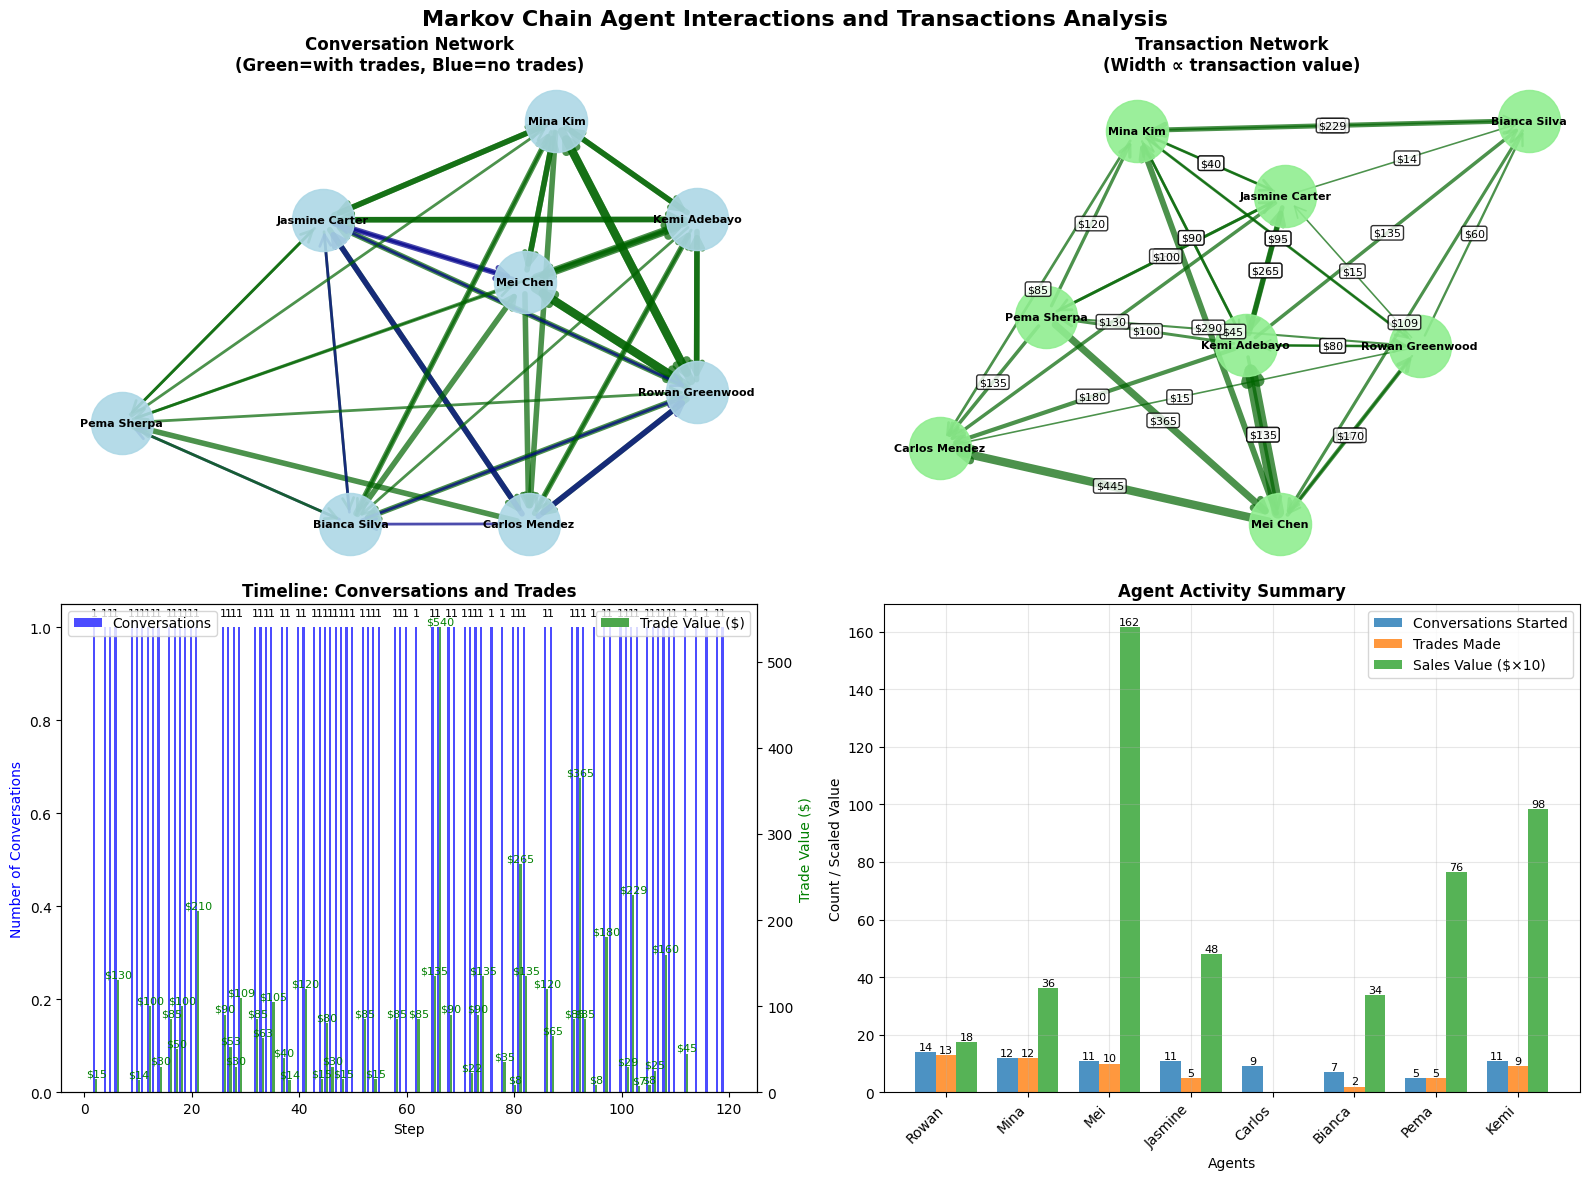


INTERACTION AND TRANSACTION SUMMARY
Total Conversations: 80
Conversations with Trades: 58
Total Transactions: 56
Total Transaction Value: $4720.50
Average Transaction Value: $84.29
Most Active Seller: Rowan Greenwood (13 transactions)
Most Active Buyer: Mina Kim (10 transactions)


In [26]:
# Enhanced Interaction Flow Visualization - Fixed for correct data structure
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

def create_interaction_flow_visualization(results):
    """Create comprehensive visualizations for interaction and transaction flows"""
    
    # Extract interaction history
    interactions = results.get('interaction_history', [])
    if not interactions:
        print("No interaction history found")
        return
    
    # Parse interactions and transactions with corrected structure
    conversation_flows = []
    transaction_flows = []
    
    for interaction in interactions:
        if interaction.get('type') == 'conversation':
            participants = interaction.get('participants', [])
            if len(participants) == 2:
                # Check if there were any trades in this conversation
                trades = interaction.get('trades', [])
                has_trade = len(trades) > 0
                
                conversation_flows.append({
                    'step': interaction.get('step', 0),
                    'from': participants[0],
                    'to': participants[1],
                    'has_trade': has_trade
                })
                
                # Extract trade details from the trades array
                for trade in trades:
                    if trade.get('executed') and trade.get('trade_details'):
                        trade_details = trade['trade_details']
                        # Calculate total value from items
                        items = trade_details.get('items', [])
                        # Only count non-digital-cash items for value
                        value = sum(item.get('value', 0) for item in items if item.get('name') != 'digital cash')
                        
                        transaction_flows.append({
                            'step': interaction.get('step', 0),
                            'seller': trade_details.get('participants', {}).get('seller', ''),
                            'buyer': trade_details.get('participants', {}).get('buyer', ''),
                            'items': [item.get('name', '') for item in items if item.get('name') != 'digital cash'],
                            'value': value
                        })
    
    # Create subplots
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Markov Chain Agent Interactions and Transactions Analysis', fontsize=16, fontweight='bold')
    
    # 1. Interaction Network
    create_interaction_network(conversation_flows, ax1)
    
    # 2. Transaction Network
    create_transaction_network(transaction_flows, ax2)
    
    # 3. Timeline Analysis
    create_timeline_analysis(conversation_flows, transaction_flows, ax3)
    
    # 4. Agent Activity Summary
    create_agent_summary(conversation_flows, transaction_flows, ax4)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print_summary_stats(conversation_flows, transaction_flows)

def create_interaction_network(conversations, ax):
    """Create network diagram of conversations"""
    if not conversations:
        ax.text(0.5, 0.5, 'No conversations found', ha='center', va='center', transform=ax.transAxes)
        ax.set_title('Conversation Network')
        return
        
    # Count interactions between agents
    interaction_counts = defaultdict(int)
    trade_counts = defaultdict(int)
    
    for conv in conversations:
        key = (conv['from'], conv['to'])
        interaction_counts[key] += 1
        if conv['has_trade']:
            trade_counts[key] += 1
    
    # Create network graph
    G = nx.DiGraph()
    for (from_agent, to_agent), count in interaction_counts.items():
        G.add_edge(from_agent, to_agent, weight=count, trades=trade_counts[(from_agent, to_agent)])
    
    # Layout and drawing
    pos = nx.spring_layout(G, k=2, iterations=50)
    
    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', 
                          node_size=2000, alpha=0.9, ax=ax)
    nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold', ax=ax)
    
    # Draw edges with varying thickness
    for (u, v, data) in G.edges(data=True):
        width = data['weight'] * 2
        color = 'darkgreen' if data['trades'] > 0 else 'darkblue'
        nx.draw_networkx_edges(G, pos, [(u, v)], width=width, 
                              alpha=0.7, edge_color=color, ax=ax,
                              arrowsize=20, arrowstyle='->')
    
    ax.set_title('Conversation Network\n(Green=with trades, Blue=no trades)', fontweight='bold')
    ax.axis('off')

def create_transaction_network(transactions, ax):
    """Create network diagram of transactions"""
    if not transactions:
        ax.text(0.5, 0.5, 'No transactions found', ha='center', va='center', transform=ax.transAxes)
        ax.set_title('Transaction Network')
        return
        
    # Aggregate transaction values
    trade_values = defaultdict(float)
    trade_counts = defaultdict(int)
    
    for trade in transactions:
        key = (trade['seller'], trade['buyer'])
        trade_values[key] += trade['value']
        trade_counts[key] += 1
    
    # Create network graph
    G = nx.DiGraph()
    for (seller, buyer), value in trade_values.items():
        G.add_edge(seller, buyer, value=value, count=trade_counts[(seller, buyer)])
    
    # Layout and drawing
    pos = nx.spring_layout(G, k=2, iterations=50)
    
    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_color='lightgreen', 
                          node_size=2000, alpha=0.9, ax=ax)
    nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold', ax=ax)
    
    # Draw edges with thickness proportional to value
    if trade_values:
        max_value = max(trade_values.values())
        for (u, v, data) in G.edges(data=True):
            width = (data['value'] / max_value) * 8 + 1 if max_value > 0 else 2
            nx.draw_networkx_edges(G, pos, [(u, v)], width=width, 
                                  alpha=0.7, edge_color='darkgreen', ax=ax,
                                  arrowsize=20, arrowstyle='->')
            
            # Add value labels
            edge_pos = ((pos[u][0] + pos[v][0])/2, (pos[u][1] + pos[v][1])/2)
            ax.text(edge_pos[0], edge_pos[1], f'${data["value"]:.0f}', 
                   fontsize=8, ha='center', va='center', 
                   bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.8))
    
    ax.set_title('Transaction Network\n(Width ∝ transaction value)', fontweight='bold')
    ax.axis('off')

def create_timeline_analysis(conversations, transactions, ax):
    """Create timeline of interactions and transactions"""
    if not conversations and not transactions:
        ax.text(0.5, 0.5, 'No data for timeline', ha='center', va='center', transform=ax.transAxes)
        ax.set_title('Timeline Analysis')
        return
        
    # Get all steps
    all_steps = set()
    if conversations:
        all_steps.update(conv['step'] for conv in conversations)
    if transactions:
        all_steps.update(trade['step'] for trade in transactions)
    
    steps = sorted(all_steps)
    
    # Count events per step
    conv_counts = defaultdict(int)
    trade_values = defaultdict(float)
    
    for conv in conversations:
        conv_counts[conv['step']] += 1
        
    for trade in transactions:
        trade_values[trade['step']] += trade['value']
    
    # Create timeline plot
    x = np.array(steps)
    conv_y = [conv_counts[step] for step in steps]
    trade_y = [trade_values[step] for step in steps]
    
    # Dual y-axis
    ax2 = ax.twinx()
    
    bars1 = ax.bar(x - 0.2, conv_y, 0.4, label='Conversations', alpha=0.7, color='blue')
    bars2 = ax2.bar(x + 0.2, trade_y, 0.4, label='Trade Value ($)', alpha=0.7, color='green')
    
    ax.set_xlabel('Step')
    ax.set_ylabel('Number of Conversations', color='blue')
    ax2.set_ylabel('Trade Value ($)', color='green')
    ax.set_title('Timeline: Conversations and Trades', fontweight='bold')
    
    # Add value labels
    for bar, val in zip(bars1, conv_y):
        if val > 0:
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
                   str(int(val)), ha='center', va='bottom', fontsize=8)
    
    for bar, val in zip(bars2, trade_y):
        if val > 0:
            ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                    f'${val:.0f}', ha='center', va='bottom', fontsize=8, color='green')
    
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')

def create_agent_summary(conversations, transactions, ax):
    """Create summary of agent activities"""
    # Collect agent stats
    agent_stats = defaultdict(lambda: {'conversations_initiated': 0, 'conversations_received': 0, 
                                      'trades_sold': 0, 'trades_bought': 0, 
                                      'value_sold': 0, 'value_bought': 0})
    
    for conv in conversations:
        agent_stats[conv['from']]['conversations_initiated'] += 1
        agent_stats[conv['to']]['conversations_received'] += 1
    
    for trade in transactions:
        agent_stats[trade['seller']]['trades_sold'] += 1
        agent_stats[trade['seller']]['value_sold'] += trade['value']
        agent_stats[trade['buyer']]['trades_bought'] += 1
        agent_stats[trade['buyer']]['value_bought'] += trade['value']
    
    # Create summary visualization
    agents = list(agent_stats.keys())
    if not agents:
        ax.text(0.5, 0.5, 'No agent data', ha='center', va='center', transform=ax.transAxes)
        return
        
    # Prepare data
    conv_init = [agent_stats[agent]['conversations_initiated'] for agent in agents]
    trades_sold = [agent_stats[agent]['trades_sold'] for agent in agents]
    value_sold = [agent_stats[agent]['value_sold']/10 for agent in agents]  # Scale for visibility
    
    # Create grouped bar chart
    x = np.arange(len(agents))
    width = 0.25
    
    bars1 = ax.bar(x - width, conv_init, width, label='Conversations Started', alpha=0.8)
    bars2 = ax.bar(x, trades_sold, width, label='Trades Made', alpha=0.8)
    bars3 = ax.bar(x + width, value_sold, width, label='Sales Value ($×10)', alpha=0.8)
    
    ax.set_xlabel('Agents')
    ax.set_ylabel('Count / Scaled Value')
    ax.set_title('Agent Activity Summary', fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels([name.split()[0] for name in agents], rotation=45, ha='right')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Add value labels
    for bars in [bars1, bars2, bars3]:
        for bar in bars:
            height = bar.get_height()
            if height > 0:
                ax.text(bar.get_x() + bar.get_width()/2., height + 0.05,
                       f'{height:.0f}', ha='center', va='bottom', fontsize=8)

def print_summary_stats(conversations, transactions):
    """Print summary statistics"""
    print("\n" + "="*50)
    print("INTERACTION AND TRANSACTION SUMMARY")
    print("="*50)
    
    print(f"Total Conversations: {len(conversations)}")
    print(f"Conversations with Trades: {sum(1 for c in conversations if c['has_trade'])}")
    print(f"Total Transactions: {len(transactions)}")
    
    if transactions:
        total_value = sum(t['value'] for t in transactions)
        avg_value = total_value / len(transactions)
        print(f"Total Transaction Value: ${total_value:.2f}")
        print(f"Average Transaction Value: ${avg_value:.2f}")
        
        # Most active traders
        sellers = defaultdict(int)
        buyers = defaultdict(int)
        for t in transactions:
            sellers[t['seller']] += 1
            buyers[t['buyer']] += 1
            
        if sellers:
            top_seller = max(sellers.items(), key=lambda x: x[1])
            print(f"Most Active Seller: {top_seller[0]} ({top_seller[1]} transactions)")
            
        if buyers:
            top_buyer = max(buyers.items(), key=lambda x: x[1])
            print(f"Most Active Buyer: {top_buyer[0]} ({top_buyer[1]} transactions)")

# Run the visualization
create_interaction_flow_visualization(results)

In [27]:
from collections import defaultdict

# Detailed Transaction Analysis - Fixed for correct data structure
def analyze_transaction_patterns(results):
    """Analyze detailed transaction patterns and item flows"""
    
    interactions = results.get('interaction_history', [])
    transactions = []
    
    # Extract all transaction details with corrected structure
    for interaction in interactions:
        if interaction.get('type') == 'conversation':
            trades = interaction.get('trades', [])
            for trade in trades:
                if trade.get('executed') and trade.get('trade_details'):
                    trade_details = trade['trade_details']
                    items = trade_details.get('items', [])
                    # Filter out digital cash from items list for cleaner analysis
                    actual_items = [item for item in items if item.get('name') != 'digital cash']
                    
                    transactions.append({
                        'step': interaction.get('step', 0),
                        'seller': trade_details.get('participants', {}).get('seller', ''),
                        'buyer': trade_details.get('participants', {}).get('buyer', ''),
                        'items': actual_items,
                        'total_value': sum(item.get('value', 0) for item in actual_items)
                    })
    
    if not transactions:
        print("No transactions found in the data")
        return
    
    print("\n" + "="*60)
    print("DETAILED TRANSACTION ANALYSIS")
    print("="*60)
    
    # 1. Transaction by transaction breakdown
    print("\n1. TRANSACTION BREAKDOWN:")
    print("-" * 40)
    for i, trade in enumerate(transactions, 1):
        print(f"\nTransaction {i} (Step {trade['step']}):")
        print(f"  Seller: {trade['seller']}")
        print(f"  Buyer: {trade['buyer']}")
        print(f"  Items:")
        for item in trade['items']:
            print(f"    - {item.get('name', 'Unknown').replace('_', ' ').title()}: {item.get('quantity', 0)} units @ ${item.get('value', 0)}")
        print(f"  Total Value: ${trade['total_value']:.2f}")
    
    # 2. Item flow analysis
    print("\n2. ITEM FLOW ANALYSIS:")
    print("-" * 40)
    item_flows = defaultdict(list)
    for trade in transactions:
        for item in trade['items']:
            if item.get('name'):
                item_flows[item['name']].append({
                    'step': trade['step'],
                    'from': trade['seller'],
                    'to': trade['buyer'],
                    'quantity': item.get('quantity', 0),
                    'value': item.get('value', 0)
                })
    
    for item_name, flows in item_flows.items():
        print(f"\n{item_name.replace('_', ' ').title()}:")
        for flow in flows:
            print(f"  Step {flow['step']}: {flow['from']} → {flow['to']} "
                  f"({flow['quantity']} units, ${flow['value']:.2f})")
    
    # 3. Agent trading profiles
    print("\n3. AGENT TRADING PROFILES:")
    print("-" * 40)
    agent_profiles = defaultdict(lambda: {'sold': [], 'bought': [], 'revenue': 0, 'spending': 0})
    
    for trade in transactions:
        seller = trade['seller']
        buyer = trade['buyer']
        
        agent_profiles[seller]['revenue'] += trade['total_value']
        agent_profiles[buyer]['spending'] += trade['total_value']
        
        for item in trade['items']:
            if item.get('name'):
                agent_profiles[seller]['sold'].append(item['name'])
                agent_profiles[buyer]['bought'].append(item['name'])
    
    for agent, profile in agent_profiles.items():
        print(f"\n{agent}:")
        print(f"  Revenue: ${profile['revenue']:.2f}")
        print(f"  Spending: ${profile['spending']:.2f}")
        print(f"  Net: ${profile['revenue'] - profile['spending']:.2f}")
        if profile['sold']:
            sold_items = [item.replace('_', ' ').title() for item in set(profile['sold'])]
            print(f"  Items sold: {', '.join(sold_items)}")
        if profile['bought']:
            bought_items = [item.replace('_', ' ').title() for item in set(profile['bought'])]
            print(f"  Items bought: {', '.join(bought_items)}")
    
    # 4. Market dynamics
    print("\n4. MARKET DYNAMICS:")
    print("-" * 40)
    
    # Trading volume over time
    steps = [t['step'] for t in transactions]
    values = [t['total_value'] for t in transactions]
    
    print(f"Total trading volume: ${sum(values):.2f}")
    print(f"Average transaction value: ${sum(values)/len(values):.2f}")
    print(f"Most valuable transaction: ${max(values):.2f} (Step {steps[values.index(max(values))]})")
    print(f"Least valuable transaction: ${min(values):.2f} (Step {steps[values.index(min(values))]})")
    
    # Trading frequency
    step_counts = defaultdict(int)
    for step in steps:
        step_counts[step] += 1
    
    busiest_step = max(step_counts.items(), key=lambda x: x[1])
    print(f"Busiest trading step: Step {busiest_step[0]} ({busiest_step[1]} transactions)")
    
    # Item popularity
    print("\n5. ITEM TRADING PATTERNS:")
    print("-" * 40)
    item_stats = defaultdict(lambda: {'trades': 0, 'total_value': 0, 'total_quantity': 0})
    
    for trade in transactions:
        for item in trade['items']:
            name = item.get('name', '')
            if name:
                item_stats[name]['trades'] += 1
                item_stats[name]['total_value'] += item.get('value', 0)
                item_stats[name]['total_quantity'] += item.get('quantity', 0)
    
    # Sort by total value traded
    sorted_items = sorted(item_stats.items(), key=lambda x: x[1]['total_value'], reverse=True)
    
    for item_name, stats in sorted_items:
        avg_value = stats['total_value'] / stats['total_quantity'] if stats['total_quantity'] > 0 else 0
        print(f"{item_name.replace('_', ' ').title()}:")
        print(f"  Total trades: {stats['trades']}")
        print(f"  Total quantity: {stats['total_quantity']} units")
        print(f"  Total value: ${stats['total_value']:.2f}")
        print(f"  Average value per unit: ${avg_value:.2f}")
        print()
    
    return transactions

# Run the detailed analysis
transaction_data = analyze_transaction_patterns(results)


DETAILED TRANSACTION ANALYSIS

1. TRANSACTION BREAKDOWN:
----------------------------------------

Transaction 1 (Step 2):
  Seller: Rowan Greenwood
  Buyer: Mina Kim
  Items:
    - Herbal Tea: 1 units @ $15.0
  Total Value: $15.00

Transaction 2 (Step 6):
  Seller: Jasmine Carter
  Buyer: Carlos Mendez
  Items:
    - Notebooks: 4 units @ $14.0
    - Graphing Calculator: 1 units @ $116.0
  Total Value: $130.00

Transaction 3 (Step 10):
  Seller: Jasmine Carter
  Buyer: Bianca Silva
  Items:
    - Notebooks: 4 units @ $14.0
  Total Value: $14.00

Transaction 4 (Step 12):
  Seller: Pema Sherpa
  Buyer: Jasmine Carter
  Items:
    - Mountain Flower Honey: 1 units @ $45.0
    - Pine Honey: 1 units @ $55.0
  Total Value: $100.00

Transaction 5 (Step 14):
  Seller: Rowan Greenwood
  Buyer: Mei Chen
  Items:
    - Herbal Tea: 1 units @ $15.0
    - Black Tea: 1 units @ $15.0
  Total Value: $30.00

Transaction 6 (Step 16):
  Seller: Mei Chen
  Buyer: Mina Kim
  Items:
    - Silk Scarves: 1 uni

In [28]:
# Interactive Markov Chain Visualization
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import numpy as np
import math

def create_interactive_markov_visualization(results):
    """Create an interactive visualization of the complete Markov chain with transactions"""
    
    interactions = results.get('interaction_history', [])
    if not interactions:
        print("No interaction history found")
        return
    
    # Parse all interactions and build complete state transition data
    nodes = set()
    transitions = []
    transactions = {}
    
    for interaction in interactions:
        step = interaction.get('step', 0)
        
        if interaction.get('type') == 'conversation':
            participants = interaction.get('participants', [])
            if len(participants) == 2:
                from_agent, to_agent = participants[0], participants[1]
                nodes.add(from_agent)
                nodes.add(to_agent)
                
                # Check for trades in this conversation
                trades = interaction.get('trades', [])
                trade_info = None
                total_value = 0
                items_traded = []
                
                if trades:
                    for trade in trades:
                        if trade.get('executed') and trade.get('trade_details'):
                            trade_details = trade['trade_details']
                            items = trade_details.get('items', [])
                            actual_items = [item for item in items if item.get('name') != 'digital cash']
                            
                            total_value += sum(item.get('value', 0) for item in actual_items)
                            items_traded.extend([f"{item.get('name', '').replace('_', ' ').title()} (${item.get('value', 0)})" 
                                               for item in actual_items])
                
                transitions.append({
                    'step': step,
                    'from': from_agent,
                    'to': to_agent,
                    'type': 'conversation',
                    'has_trade': len(trades) > 0,
                    'trade_value': total_value,
                    'items': items_traded
                })
                
        elif interaction.get('type') == 'reflection':
            agent = interaction.get('agent', '')
            if agent:
                nodes.add(agent)
                transitions.append({
                    'step': step,
                    'from': agent,
                    'to': agent,
                    'type': 'reflection',
                    'has_trade': False,
                    'trade_value': 0,
                    'items': []
                })
    
    # Create the interactive plot
    return create_plotly_network(list(nodes), transitions)

def create_plotly_network(nodes, transitions):
    """Create interactive plotly network visualization"""
    
    # Create node positions in a circle
    n_nodes = len(nodes)
    node_positions = {}
    for i, node in enumerate(nodes):
        angle = 2 * math.pi * i / n_nodes
        node_positions[node] = {
            'x': math.cos(angle) * 2,
            'y': math.sin(angle) * 2
        }
    
    # Prepare edge traces
    edge_traces = []
    edge_info = []
    
    # Group transitions by (from, to) pair
    edge_groups = defaultdict(list)
    for transition in transitions:
        key = (transition['from'], transition['to'])
        edge_groups[key].append(transition)
    
    # Create edges with different styles
    for (from_node, to_node), trans_list in edge_groups.items():
        x0, y0 = node_positions[from_node]['x'], node_positions[from_node]['y']
        x1, y1 = node_positions[to_node]['x'], node_positions[to_node]['y']
        
        # Aggregate information
        total_interactions = len(trans_list)
        total_trades = sum(1 for t in trans_list if t['has_trade'])
        total_value = sum(t['trade_value'] for t in trans_list)
        all_items = []
        for t in trans_list:
            all_items.extend(t['items'])
        
        # Determine edge properties
        is_self_loop = (from_node == to_node)
        has_trades = total_trades > 0
        
        # Create hover text
        hover_text = f"<b>{from_node} → {to_node}</b><br>"
        hover_text += f"Total Interactions: {total_interactions}<br>"
        if has_trades:
            hover_text += f"Trades: {total_trades}<br>"
            hover_text += f"Total Value: ${total_value:.2f}<br>"
            if all_items:
                hover_text += f"Items: {', '.join(set(all_items))}<br>"
        
        steps = [str(t['step']) for t in trans_list]
        hover_text += f"Steps: {', '.join(steps)}"
        
        # Handle self-loops differently
        if is_self_loop:
            # Create a small arc for self-loops
            arc_x, arc_y = create_self_loop_arc(x0, y0, 0.3)
            edge_x = arc_x
            edge_y = arc_y
        else:
            edge_x = [x0, x1, None]
            edge_y = [y0, y1, None]
        
        # Choose color based on trade status
        if has_trades:
            color = f'rgba(0, 150, 0, {min(0.3 + total_value/100, 1.0)})'  # Green with opacity based on value
        elif from_node == to_node:
            color = 'rgba(200, 100, 0, 0.8)'  # Orange for reflections
        else:
            color = 'rgba(100, 100, 200, 0.5)'  # Blue for conversations without trades
        
        # Line width based on interaction count
        line_width = min(1 + total_interactions * 2, 10)
        
        edge_trace = go.Scatter(
            x=edge_x, y=edge_y,
            line=dict(width=line_width, color=color),
            hoverinfo='text',
            hovertext=hover_text,
            mode='lines',
            name=f'{from_node} → {to_node}' if not is_self_loop else f'{from_node} (reflection)',
            showlegend=False
        )
        
        edge_traces.append(edge_trace)
    
    # Create node trace
    node_x = [node_positions[node]['x'] for node in nodes]
    node_y = [node_positions[node]['y'] for node in nodes]
    
    # Calculate node statistics
    node_stats = {}
    for node in nodes:
        conversations_started = sum(1 for t in transitions if t['from'] == node and t['type'] == 'conversation')
        conversations_received = sum(1 for t in transitions if t['to'] == node and t['type'] == 'conversation')
        reflections = sum(1 for t in transitions if t['from'] == node and t['type'] == 'reflection')
        trades_made = sum(1 for t in transitions if t['from'] == node and t['has_trade'])
        revenue = sum(t['trade_value'] for t in transitions if t['from'] == node and t['has_trade'])
        
        node_stats[node] = {
            'conversations_started': conversations_started,
            'conversations_received': conversations_received,
            'reflections': reflections,
            'trades_made': trades_made,
            'revenue': revenue
        }
    
    node_text = []
    node_colors = []
    node_sizes = []
    
    for node in nodes:
        stats = node_stats[node]
        
        # Create hover text
        hover_text = f"<b>{node}</b><br>"
        hover_text += f"Conversations Started: {stats['conversations_started']}<br>"
        hover_text += f"Conversations Received: {stats['conversations_received']}<br>"
        hover_text += f"Reflections: {stats['reflections']}<br>"
        hover_text += f"Trades Made: {stats['trades_made']}<br>"
        hover_text += f"Revenue: ${stats['revenue']:.2f}"
        
        node_text.append(hover_text)
        
        # Node color based on revenue
        if stats['revenue'] > 0:
            intensity = min(stats['revenue'] / 100, 1.0)
            node_colors.append(f'rgba(0, 200, 0, {0.3 + intensity * 0.7})')
        else:
            node_colors.append('rgba(150, 150, 200, 0.7)')
        
        # Node size based on total activity
        total_activity = stats['conversations_started'] + stats['conversations_received'] + stats['reflections']
        node_sizes.append(max(20 + total_activity * 10, 30))
    
    node_trace = go.Scatter(
        x=node_x, y=node_y,
        mode='markers+text',
        hoverinfo='text',
        hovertext=node_text,
        text=[node.split()[0] for node in nodes],  # Show first name only
        textposition="middle center",
        textfont=dict(size=10, color="white"),
        marker=dict(
            size=node_sizes,
            color=node_colors,
            line=dict(width=2, color='white'),
            sizemode='diameter'
        ),
        name='Agents',
        showlegend=False
    )
    
    # Create the figure
    fig = go.Figure(data=[node_trace] + edge_traces,
                   layout=go.Layout(
                        title=dict(
                            text='Interactive Markov Chain: Agent Interactions and Transactions',
                            x=0.5,
                            font=dict(size=16)
                        ),
                        #titlefont_size=16,
                        showlegend=False,
                        hovermode='closest',
                        margin=dict(b=20,l=5,r=5,t=40),
                        annotations=[ dict(
                            text="Hover over nodes and edges for details<br>" + 
                                 "Green edges = trades, Blue = conversations, Orange = reflections<br>" + 
                                 "Node size = activity level, Node color = revenue",
                            showarrow=False,
                            xref="paper", yref="paper",
                            x=0.005, y=-0.002,
                            xanchor='left', yanchor='bottom',
                            font=dict(size=10)
                        )],
                        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                        plot_bgcolor='rgba(0,0,0,0)',
                        width=800,
                        height=800
                   ))
    
    return fig

def create_self_loop_arc(x, y, radius):
    """Create coordinates for a self-loop arc"""
    # Create a small circle offset from the node
    angles = np.linspace(0, 2*np.pi, 20)
    arc_x = [x + radius * np.cos(angle) + radius for angle in angles] + [None]
    arc_y = [y + radius * np.sin(angle) for angle in angles] + [None]
    return arc_x, arc_y

# Create and display the interactive visualization
fig = create_interactive_markov_visualization(results)
if fig:
    fig.show()
else:
    print("Could not create visualization - no data available")

In [29]:
# Interactive Timeline View of Markov Chain Progression
def create_markov_timeline_visualization(results):
    """Create an interactive timeline showing the step-by-step Markov chain progression"""
    
    interactions = results.get('interaction_history', [])
    if not interactions:
        print("No interaction history found")
        return
    
    # Extract timeline data
    timeline_data = []
    
    for interaction in interactions:
        step = interaction.get('step', 0)
        
        if interaction.get('type') == 'conversation':
            participants = interaction.get('participants', [])
            if len(participants) == 2:
                from_agent, to_agent = participants[0], participants[1]
                
                # Check for trades
                trades = interaction.get('trades', [])
                trade_info = ""
                total_value = 0
                
                if trades:
                    for trade in trades:
                        if trade.get('executed') and trade.get('trade_details'):
                            trade_details = trade['trade_details']
                            items = trade_details.get('items', [])
                            actual_items = [item for item in items if item.get('name') != 'digital cash']
                            
                            total_value += sum(item.get('value', 0) for item in actual_items)
                            item_names = [item.get('name', '').replace('_', ' ').title() for item in actual_items]
                            trade_info = f"Trade: {', '.join(item_names)} (${total_value:.2f})"
                
                timeline_data.append({
                    'step': step,
                    'type': 'conversation',
                    'from': from_agent,
                    'to': to_agent,
                    'has_trade': len(trades) > 0,
                    'trade_value': total_value,
                    'trade_info': trade_info,
                    'description': f"{from_agent.split()[0]} → {to_agent.split()[0]}"
                })
                
        elif interaction.get('type') == 'reflection':
            agent = interaction.get('agent', '')
            if agent:
                timeline_data.append({
                    'step': step,
                    'type': 'reflection',
                    'from': agent,
                    'to': agent,
                    'has_trade': False,
                    'trade_value': 0,
                    'trade_info': "",
                    'description': f"{agent.split()[0]} reflects"
                })
    
    # Sort by step
    timeline_data.sort(key=lambda x: x['step'])
    
    # Create the timeline plot
    steps = [item['step'] for item in timeline_data]
    descriptions = [item['description'] for item in timeline_data]
    types = [item['type'] for item in timeline_data]
    trade_values = [item['trade_value'] for item in timeline_data]
    
    # Color mapping
    colors = []
    symbols = []
    sizes = []
    hover_texts = []
    
    for item in timeline_data:
        if item['type'] == 'reflection':
            colors.append('orange')
            symbols.append('circle-open')
            sizes.append(15)
            hover_text = f"<b>Step {item['step']}: Reflection</b><br>"
            hover_text += f"Agent: {item['from']}<br>"
            hover_text += "Action: Self-reflection"
        else:
            if item['has_trade']:
                colors.append('green')
                symbols.append('diamond')
                sizes.append(20 + min(item['trade_value']/5, 20))
                hover_text = f"<b>Step {item['step']}: Conversation + Trade</b><br>"
                hover_text += f"From: {item['from']}<br>"
                hover_text += f"To: {item['to']}<br>"
                hover_text += f"{item['trade_info']}"
            else:
                colors.append('blue')
                symbols.append('circle')
                sizes.append(15)
                hover_text = f"<b>Step {item['step']}: Conversation</b><br>"
                hover_text += f"From: {item['from']}<br>"
                hover_text += f"To: {item['to']}<br>"
                hover_text += "No trade occurred"
        
        hover_texts.append(hover_text)
    
    # Create the timeline figure
    fig = go.Figure()
    
    # Add the main timeline
    fig.add_trace(go.Scatter(
        x=steps,
        y=[1] * len(steps),  # All points on same y-level
        mode='markers+text',
        marker=dict(
            size=sizes,
            color=colors,
            symbol=symbols,
            line=dict(width=2, color='white'),
            opacity=0.8
        ),
        text=descriptions,
        textposition='top center',
        textfont=dict(size=10),
        hoverinfo='text',
        hovertext=hover_texts,
        name='Markov Chain Steps',
        showlegend=False
    ))
    
    # Add connecting lines
    fig.add_trace(go.Scatter(
        x=steps,
        y=[1] * len(steps),
        mode='lines',
        line=dict(color='lightgray', width=1, dash='dot'),
        hoverinfo='skip',
        showlegend=False
    ))
    
    # Add value annotations for trades
    for i, item in enumerate(timeline_data):
        if item['has_trade'] and item['trade_value'] > 0:
            fig.add_annotation(
                x=item['step'],
                y=1.15,
                text=f"${item['trade_value']:.0f}",
                showarrow=False,
                font=dict(size=9, color='green'),
                bgcolor='rgba(255,255,255,0.8)',
                bordercolor='green',
                borderwidth=1
            )
    
    # Update layout
    fig.update_layout(
        title='Interactive Markov Chain Timeline',
        xaxis_title='Step',
        xaxis=dict(
            tickmode='linear',
            dtick=1,
            showgrid=True,
            gridcolor='lightgray',
            gridwidth=1
        ),
        yaxis=dict(
            visible=False,
            range=[0.5, 1.5]
        ),
        height=400,
        margin=dict(t=80, b=60, l=50, r=50),
        annotations=[
            dict(
                text="🔵 Conversation  💎 Trade  ⭕ Reflection<br>Hover for details, size indicates trade value",
                showarrow=False,
                xref="paper", yref="paper",
                x=0.02, y=0.02,
                xanchor='left', yanchor='bottom',
                font=dict(size=10),
                bgcolor='rgba(255,255,255,0.8)',
                bordercolor='gray',
                borderwidth=1
            )
        ],
        plot_bgcolor='rgba(0,0,0,0)'
    )
    
    return fig

# Create and display the timeline visualization
timeline_fig = create_markov_timeline_visualization(results)
if timeline_fig:
    timeline_fig.show()
else:
    print("Could not create timeline visualization - no data available")

In [30]:
# Econometric Analysis: Time Series for Sales Value
import pandas as pd
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

def extract_sales_time_series(results):
    """Extract sales data and create time series for econometric analysis"""
    
    interactions = results.get('interaction_history', [])
    if not interactions:
        print("No interaction history found")
        return None
    
    # Extract all transactions with timestamps
    sales_data = []
    
    for interaction in interactions:
        step = interaction.get('step', 0)
        
        if interaction.get('type') == 'conversation':
            trades = interaction.get('trades', [])
            
            for trade in trades:
                if trade.get('executed') and trade.get('trade_details'):
                    trade_details = trade['trade_details']
                    items = trade_details.get('items', [])
                    
                    # Filter out digital cash for cleaner analysis
                    actual_items = [item for item in items if item.get('name') != 'digital cash']
                    
                    if actual_items:  # Only include if there are actual items
                        total_value = sum(item.get('value', 0) for item in actual_items)
                        
                        # Get participants
                        seller = trade_details.get('participants', {}).get('seller', '')
                        buyer = trade_details.get('participants', {}).get('buyer', '')
                        
                        # Create individual item records
                        for item in actual_items:
                            sales_data.append({
                                'step': step,
                                'seller': seller,
                                'buyer': buyer,
                                'item_name': item.get('name', '').replace('_', ' ').title(),
                                'quantity': item.get('quantity', 0),
                                'unit_value': item.get('value', 0) / max(item.get('quantity', 1), 1),
                                'total_value': item.get('value', 0),
                                'trade_total': total_value
                            })
    
    if not sales_data:
        print("No sales data found")
        return None
    
    # Convert to DataFrame
    df = pd.DataFrame(sales_data)
    
    # Create aggregate time series
    time_series = df.groupby('step').agg({
        'total_value': 'sum',
        'quantity': 'sum',
        'trade_total': 'sum'
    }).reset_index()
    
    time_series.columns = ['step', 'total_sales_value', 'total_quantity', 'total_trade_value']
    
    # Calculate additional metrics
    time_series['avg_unit_price'] = time_series['total_sales_value'] / time_series['total_quantity']
    time_series['num_transactions'] = df.groupby('step').size().values
    time_series['avg_transaction_size'] = time_series['total_trade_value'] / time_series['num_transactions']
    
    return df, time_series

def perform_econometric_analysis(time_series):
    """Perform comprehensive econometric analysis"""
    
    print("\n" + "="*60)
    print("ECONOMETRIC ANALYSIS: SALES VALUE TIME SERIES")
    print("="*60)
    
    # Basic descriptive statistics
    print("\n1. DESCRIPTIVE STATISTICS:")
    print("-" * 40)
    
    sales_values = time_series['total_sales_value']
    
    print(f"Mean Sales Value: ${sales_values.mean():.2f}")
    print(f"Median Sales Value: ${sales_values.median():.2f}")
    print(f"Standard Deviation: ${sales_values.std():.2f}")
    print(f"Coefficient of Variation: {(sales_values.std()/sales_values.mean())*100:.1f}%")
    print(f"Skewness: {stats.skew(sales_values):.3f}")
    print(f"Kurtosis: {stats.kurtosis(sales_values):.3f}")
    print(f"Min/Max: ${sales_values.min():.2f} / ${sales_values.max():.2f}")
    
    # Time series properties
    print("\n2. TIME SERIES PROPERTIES:")
    print("-" * 40)
    
    # Calculate returns (period-over-period changes)
    if len(sales_values) > 1:
        returns = sales_values.pct_change().dropna()
        log_returns = np.log(sales_values / sales_values.shift(1)).dropna()
        
        print(f"Mean Return: {returns.mean()*100:.2f}%")
        print(f"Return Volatility: {returns.std()*100:.2f}%")
        print(f"Sharpe Ratio (Return/Vol): {returns.mean()/returns.std():.3f}")
        
        # Trend analysis
        steps = time_series['step'].values
        slope, intercept, r_value, p_value, std_err = stats.linregress(steps, sales_values)
        
        print(f"\nTrend Analysis:")
        print(f"  Linear Trend Slope: {slope:.3f} ($/step)")
        print(f"  R-squared: {r_value**2:.3f}")
        print(f"  P-value: {p_value:.3f}")
        print(f"  Trend Significance: {'Significant' if p_value < 0.05 else 'Not significant'} (α=0.05)")
        
        # Autocorrelation (if enough data points)
        if len(sales_values) >= 3:
            lag1_corr = sales_values.corr(sales_values.shift(1))
            print(f"  First-order Autocorrelation: {lag1_corr:.3f}")
    
    # Price analysis
    print("\n3. PRICING DYNAMICS:")
    print("-" * 40)
    
    avg_prices = time_series['avg_unit_price'].dropna()
    if len(avg_prices) > 0:
        print(f"Mean Unit Price: ${avg_prices.mean():.2f}")
        print(f"Price Volatility: {avg_prices.std():.2f}")
        print(f"Price Range: ${avg_prices.min():.2f} - ${avg_prices.max():.2f}")
        
        if len(avg_prices) > 1:
            price_trend_slope, _, price_r2, price_p, _ = stats.linregress(
                time_series.loc[avg_prices.index, 'step'], avg_prices
            )
            print(f"Price Trend: {price_trend_slope:.3f} ($/unit per step)")
            print(f"Price Trend R²: {price_r2:.3f}")
    
    # Volume analysis
    print("\n4. VOLUME ANALYSIS:")
    print("-" * 40)
    
    volumes = time_series['total_quantity']
    transaction_counts = time_series['num_transactions']
    
    print(f"Mean Volume: {volumes.mean():.1f} units")
    print(f"Volume Volatility: {volumes.std():.1f}")
    print(f"Mean Transactions per Step: {transaction_counts.mean():.1f}")
    print(f"Max Single-Step Volume: {volumes.max():.0f} units")
    
    # Correlation analysis
    print("\n5. CORRELATION ANALYSIS:")
    print("-" * 40)
    
    corr_matrix = time_series[['total_sales_value', 'total_quantity', 'avg_unit_price', 'num_transactions']].corr()
    print("Correlation Matrix:")
    print(corr_matrix.round(3))
    
    return {
        'descriptive_stats': {
            'mean': sales_values.mean(),
            'std': sales_values.std(),
            'skewness': stats.skew(sales_values),
            'kurtosis': stats.kurtosis(sales_values)
        },
        'trend_analysis': {
            'slope': slope if len(sales_values) > 1 else None,
            'r_squared': r_value**2 if len(sales_values) > 1 else None,
            'p_value': p_value if len(sales_values) > 1 else None
        } if len(sales_values) > 1 else {},
        'correlations': corr_matrix.to_dict()
    }

# Extract sales data and perform analysis
print("Extracting sales time series data...")
sales_df, time_series_df = extract_sales_time_series(results)

if time_series_df is not None and not time_series_df.empty:
    print(f"Successfully extracted {len(sales_df)} individual sales records")
    print(f"Time series covers {len(time_series_df)} steps")
    
    # Display time series data
    print("\nTime Series Data:")
    print(time_series_df.round(2))
    
    # Perform econometric analysis
    econ_results = perform_econometric_analysis(time_series_df)
else:
    print("No sales data available for analysis")

Extracting sales time series data...
Successfully extracted 95 individual sales records
Time series covers 52 steps

Time Series Data:
    step  total_sales_value  total_quantity  total_trade_value  \
0      2               15.0               1               15.0   
1      6              130.0               5              260.0   
2     10               14.0               4               14.0   
3     12              100.0               2              200.0   
4     14               30.0               2               60.0   
5     16               85.0               1               85.0   
6     17               50.0               2              100.0   
7     18              100.0               2              200.0   
8     21              210.0               3              420.0   
9     26               90.0               2              180.0   
10    27               53.0               2              106.0   
11    28               30.0               2               30.0   
12    2

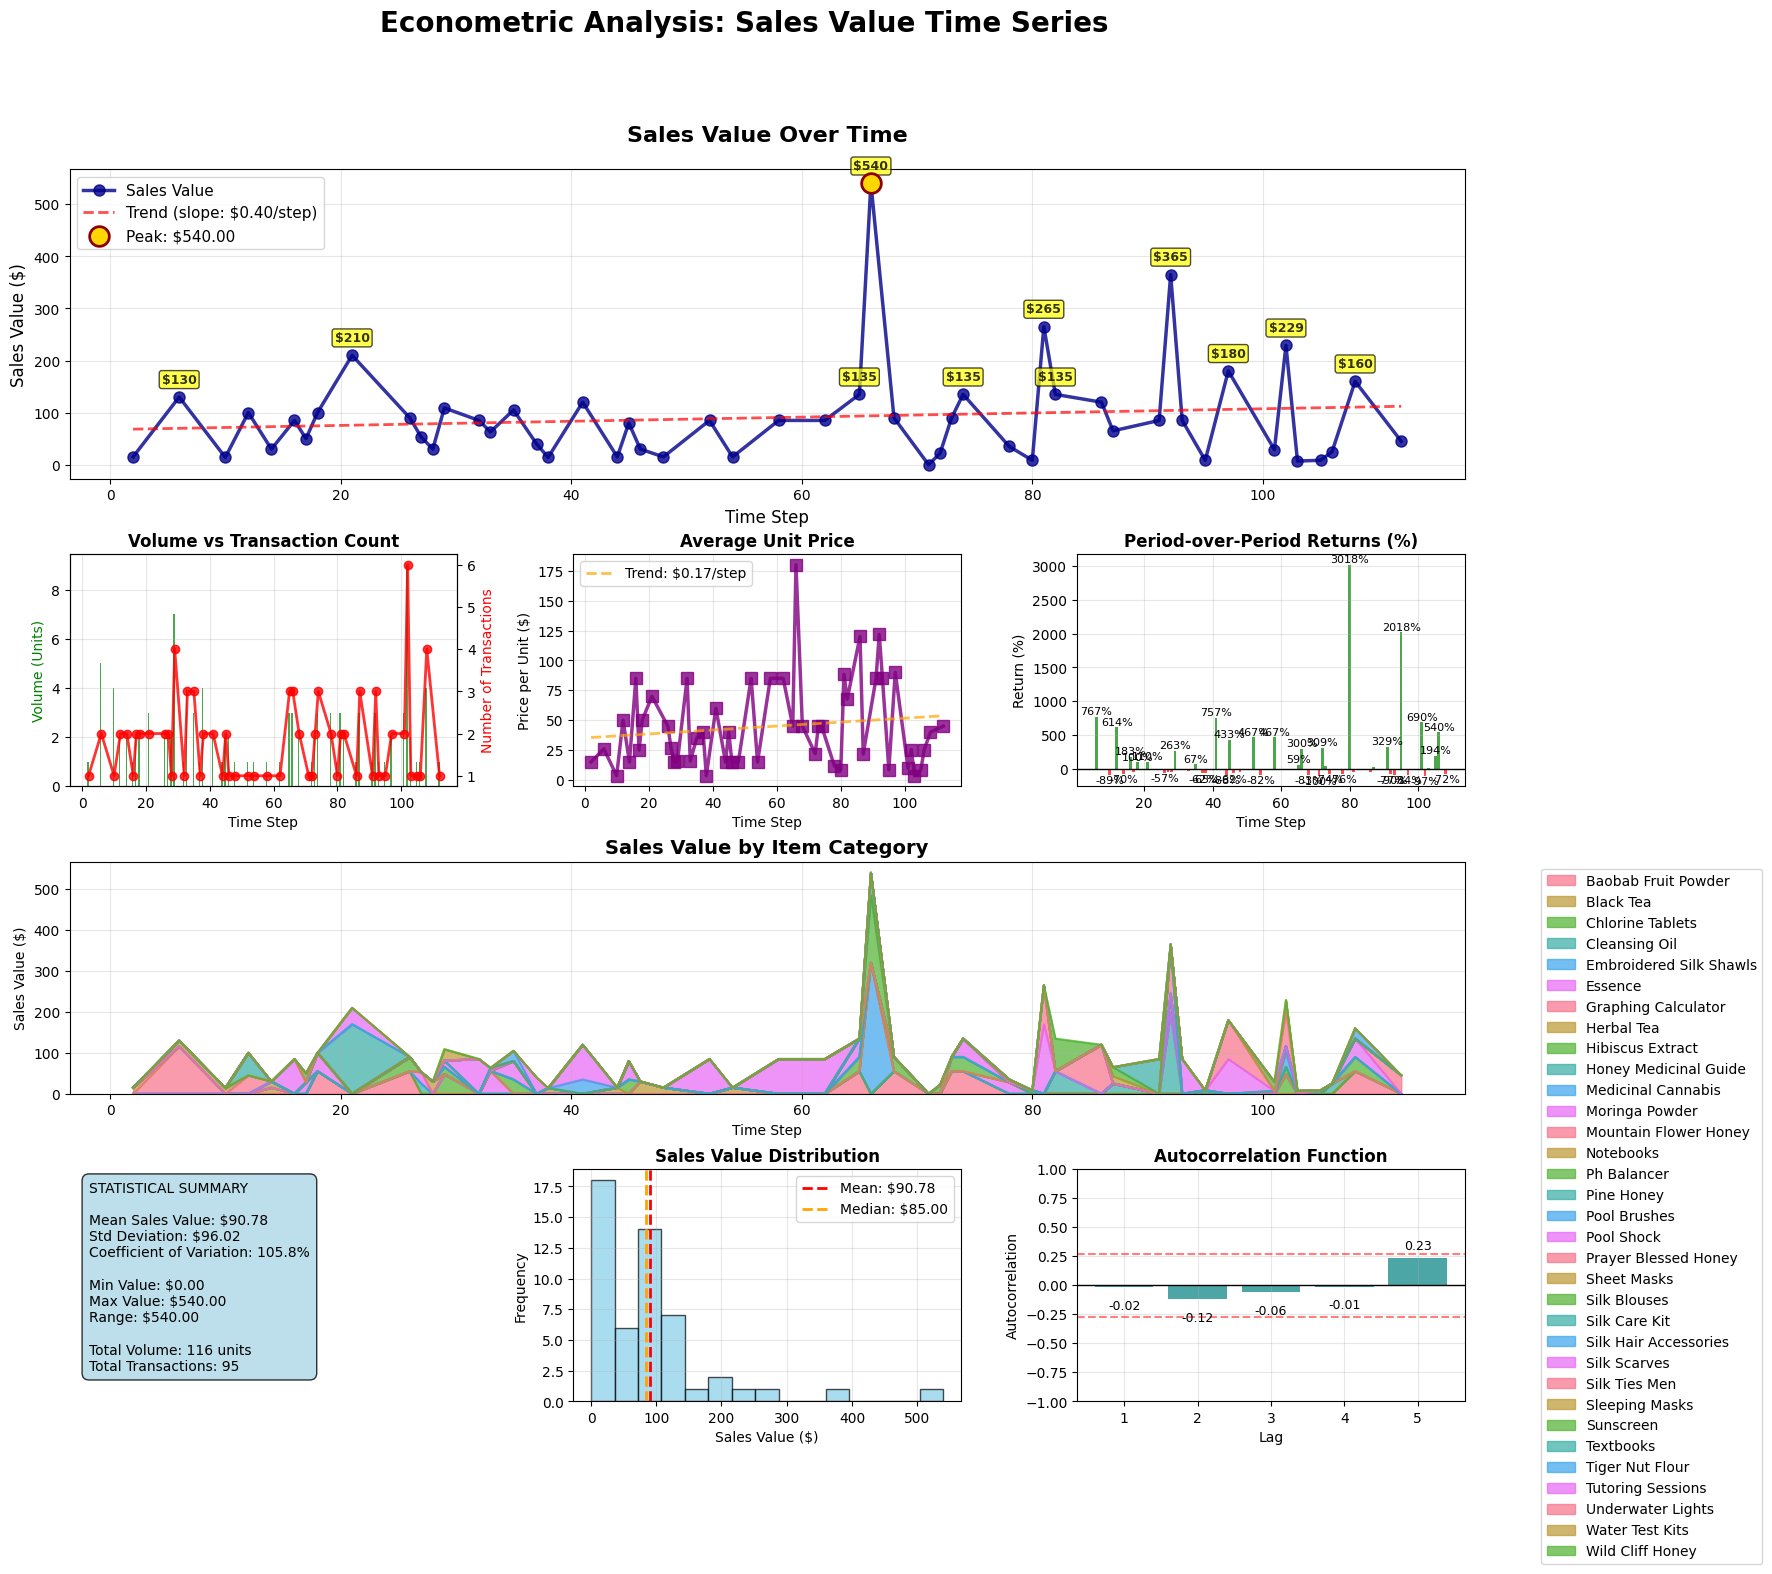

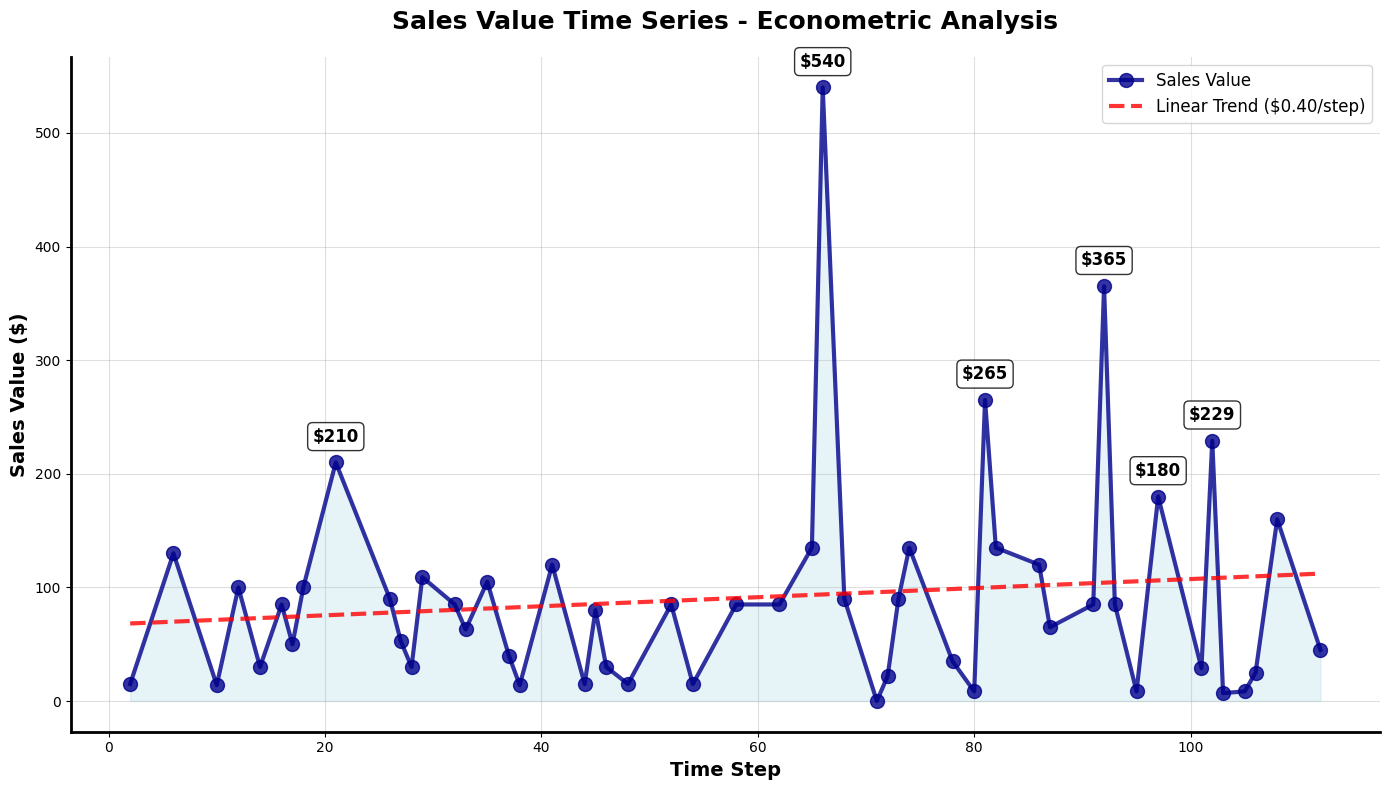

In [34]:
# Time Series Visualization for Sales Value
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.patches import Rectangle
import seaborn as sns

def create_sales_time_series_plots(sales_df, time_series_df):
    """Create comprehensive time series visualizations for sales analysis"""
    
    if time_series_df is None or time_series_df.empty:
        print("No data available for visualization")
        return
    
    # Set up the plotting style
    plt.style.use('default')
    sns.set_palette("husl")
    
    # Create a comprehensive figure with multiple subplots
    fig = plt.figure(figsize=(18, 16))
    gs = fig.add_gridspec(4, 3, hspace=0.3, wspace=0.3, height_ratios=[2, 1.5, 1.5, 1.5])
    
    # Main title
    fig.suptitle('Econometric Analysis: Sales Value Time Series', fontsize=20, fontweight='bold', y=0.98)
    
    # 1. Main Time Series Plot (spans top row)
    ax1 = fig.add_subplot(gs[0, :])
    
    # Plot sales value with trend line
    steps = time_series_df['step']
    sales_values = time_series_df['total_sales_value']
    
    # Main line plot
    ax1.plot(steps, sales_values, 'o-', linewidth=2.5, markersize=8, 
             color='darkblue', alpha=0.8, label='Sales Value')
    
    # Add trend line if enough data
    if len(sales_values) > 1:
        z = np.polyfit(steps, sales_values, 1)
        trend_line = np.poly1d(z)
        ax1.plot(steps, trend_line(steps), '--', linewidth=2, 
                color='red', alpha=0.7, label=f'Trend (slope: ${z[0]:.2f}/step)')
    
    # Highlight high-value points
    max_value_idx = sales_values.idxmax()
    ax1.scatter(steps.iloc[max_value_idx], sales_values.iloc[max_value_idx], 
               s=200, color='gold', edgecolor='darkred', linewidth=2, 
               zorder=5, label=f'Peak: ${sales_values.max():.2f}')
    
    ax1.set_title('Sales Value Over Time', fontsize=16, fontweight='bold', pad=20)
    ax1.set_xlabel('Time Step', fontsize=12)
    ax1.set_ylabel('Sales Value ($)', fontsize=12)
    ax1.grid(True, alpha=0.3)
    ax1.legend(loc='upper left', fontsize=11)
    
    # Add value annotations for peak values only (to avoid clutter)
    peak_threshold = sales_values.quantile(0.8)  # Top 20% of values
    for i, (step, value) in enumerate(zip(steps, sales_values)):
        if value >= peak_threshold:
            ax1.annotate(f'${value:.0f}', (step, value), 
                        textcoords="offset points", xytext=(0,10), ha='center',
                        fontsize=9, fontweight='bold', alpha=0.8,
                        bbox=dict(boxstyle="round,pad=0.2", facecolor='yellow', alpha=0.7))
    
    # 2. Volume and Transaction Count (second row, left)
    ax2 = fig.add_subplot(gs[1, 0])
    
    ax2_twin = ax2.twinx()
    
    # Volume bars
    bars1 = ax2.bar(steps - 0.2, time_series_df['total_quantity'], 0.4, 
                   alpha=0.7, color='green', label='Volume (units)')
    
    # Transaction count line
    line1 = ax2_twin.plot(steps, time_series_df['num_transactions'], 'ro-', 
                         linewidth=2, markersize=6, alpha=0.8, label='# Transactions')
    
    ax2.set_xlabel('Time Step')
    ax2.set_ylabel('Volume (Units)', color='green')
    ax2_twin.set_ylabel('Number of Transactions', color='red')
    ax2.set_title('Volume vs Transaction Count', fontweight='bold')
    ax2.grid(True, alpha=0.3)
    
    # 3. Average Unit Price (second row, middle)
    ax3 = fig.add_subplot(gs[1, 1])
    
    avg_prices = time_series_df['avg_unit_price'].dropna()
    price_steps = time_series_df.loc[avg_prices.index, 'step']
    
    ax3.plot(price_steps, avg_prices, 's-', linewidth=2.5, markersize=8,
            color='purple', alpha=0.8)
    ax3.set_title('Average Unit Price', fontweight='bold')
    ax3.set_xlabel('Time Step')
    ax3.set_ylabel('Price per Unit ($)')
    ax3.grid(True, alpha=0.3)
    
    # Add price trend line
    if len(avg_prices) > 1:
        price_trend = np.polyfit(price_steps, avg_prices, 1)
        trend_line = np.poly1d(price_trend)
        ax3.plot(price_steps, trend_line(price_steps), '--', 
                linewidth=2, color='orange', alpha=0.7,
                label=f'Trend: ${price_trend[0]:.2f}/step')
        ax3.legend()
    
    # 4. Returns Analysis (second row, right)
    ax4 = fig.add_subplot(gs[1, 2])
    
    if len(sales_values) > 1:
        returns = sales_values.pct_change().dropna() * 100
        # Handle infinite returns (division by zero)
        returns = returns.replace([np.inf, -np.inf], np.nan).dropna()
        
        if len(returns) > 0:
            return_steps = steps.iloc[1:len(returns)+1]  # Adjust for returns length
            
            colors = ['green' if r >= 0 else 'red' for r in returns]
            bars2 = ax4.bar(return_steps, returns, alpha=0.7, color=colors)
            ax4.axhline(y=0, color='black', linestyle='-', linewidth=1)
            ax4.set_title('Period-over-Period Returns (%)', fontweight='bold')
            ax4.set_xlabel('Time Step')
            ax4.set_ylabel('Return (%)')
            ax4.grid(True, alpha=0.3)
            
            # Add return labels for significant changes only
            for bar, ret in zip(bars2, returns):
                if abs(ret) > 50:  # Only label large changes
                    height = bar.get_height()
                    ax4.text(bar.get_x() + bar.get_width()/2., 
                            height + (5 if height >= 0 else -10),
                            f'{ret:.0f}%', ha='center', 
                            va='bottom' if height >= 0 else 'top', fontsize=8)
        else:
            ax4.text(0.5, 0.5, 'No valid returns\nto display', 
                    ha='center', va='center', transform=ax4.transAxes, fontsize=12)
    else:
        ax4.text(0.5, 0.5, 'Need more data\nfor returns analysis', 
                ha='center', va='center', transform=ax4.transAxes, fontsize=12)
        ax4.set_title('Returns Analysis', fontweight='bold')
    
    # 5. Individual Item Sales (third row)
    ax5 = fig.add_subplot(gs[2, :])
    
    if sales_df is not None and not sales_df.empty:
        # Aggregate by item and step
        item_pivot = sales_df.pivot_table(
            index='step', columns='item_name', values='total_value', 
            aggfunc='sum', fill_value=0
        )
        
        # Plot stacked area chart
        item_pivot.plot.area(ax=ax5, alpha=0.7, stacked=True)
        ax5.set_title('Sales Value by Item Category', fontweight='bold', fontsize=14)
        ax5.set_xlabel('Time Step')
        ax5.set_ylabel('Sales Value ($)')
        ax5.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        ax5.grid(True, alpha=0.3)
    
    # 6. Statistical Summary (fourth row, left)
    ax6 = fig.add_subplot(gs[3, 0])
    ax6.axis('off')
    
    # Create summary table
    stats_text = (
        "STATISTICAL SUMMARY\n\n"
        f"Mean Sales Value: ${sales_values.mean():.2f}\n"
        f"Std Deviation: ${sales_values.std():.2f}\n"
        f"Coefficient of Variation: {(sales_values.std()/sales_values.mean())*100:.1f}%\n\n"
        f"Min Value: ${sales_values.min():.2f}\n"
        f"Max Value: ${sales_values.max():.2f}\n"
        f"Range: ${sales_values.max() - sales_values.min():.2f}\n\n"
        f"Total Volume: {time_series_df['total_quantity'].sum():.0f} units\n"
        f"Total Transactions: {time_series_df['num_transactions'].sum():.0f}"
    )
    
    ax6.text(0.05, 0.95, stats_text, transform=ax6.transAxes, fontsize=10,
            verticalalignment='top', bbox=dict(boxstyle="round,pad=0.5", 
            facecolor='lightblue', alpha=0.8))
    
    # 7. Distribution Analysis (fourth row, middle)
    ax7 = fig.add_subplot(gs[3, 1])
    
    # Histogram of sales values
    n_bins = min(15, len(sales_values))
    ax7.hist(sales_values, bins=n_bins, alpha=0.7, color='skyblue', edgecolor='black')
    ax7.axvline(sales_values.mean(), color='red', linestyle='--', 
               linewidth=2, label=f'Mean: ${sales_values.mean():.2f}')
    ax7.axvline(sales_values.median(), color='orange', linestyle='--', 
               linewidth=2, label=f'Median: ${sales_values.median():.2f}')
    ax7.set_title('Sales Value Distribution', fontweight='bold')
    ax7.set_xlabel('Sales Value ($)')
    ax7.set_ylabel('Frequency')
    ax7.legend()
    ax7.grid(True, alpha=0.3)
    
    # 8. Autocorrelation Plot (fourth row, right)
    ax8 = fig.add_subplot(gs[3, 2])
    
    if len(sales_values) >= 3:
        # Calculate autocorrelations for multiple lags
        max_lags = min(5, len(sales_values) - 1)
        lags = range(1, max_lags + 1)
        autocorrs = []
        
        for lag in lags:
            corr = sales_values.corr(sales_values.shift(lag))
            autocorrs.append(corr if not np.isnan(corr) else 0)
        
        bars3 = ax8.bar(lags, autocorrs, alpha=0.7, color='teal')
        ax8.axhline(y=0, color='black', linestyle='-', linewidth=1)
        ax8.set_title('Autocorrelation Function', fontweight='bold')
        ax8.set_xlabel('Lag')
        ax8.set_ylabel('Autocorrelation')
        ax8.set_ylim(-1, 1)
        ax8.grid(True, alpha=0.3)
        
        # Add significance bounds (approximate)
        n = len(sales_values)
        bound = 1.96 / np.sqrt(n)
        ax8.axhline(y=bound, color='red', linestyle='--', alpha=0.5)
        ax8.axhline(y=-bound, color='red', linestyle='--', alpha=0.5)
        
        # Add value labels
        for bar, corr in zip(bars3, autocorrs):
            height = bar.get_height()
            ax8.text(bar.get_x() + bar.get_width()/2., 
                    height + (0.05 if height >= 0 else -0.1),
                    f'{corr:.2f}', ha='center', 
                    va='bottom' if height >= 0 else 'top', fontsize=9)
    else:
        ax8.text(0.5, 0.5, 'Need more data\nfor autocorrelation', 
                ha='center', va='center', transform=ax8.transAxes, fontsize=12)
        ax8.set_title('Autocorrelation Analysis', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Create additional focused time series plot
    fig2, ax = plt.subplots(figsize=(14, 8))
    
    # Enhanced time series plot
    ax.plot(steps, sales_values, 'o-', linewidth=3, markersize=10, 
           color='darkblue', alpha=0.8, label='Sales Value')
    
    # Fill area under curve
    ax.fill_between(steps, sales_values, alpha=0.3, color='lightblue')
    
    # Add trend line
    if len(sales_values) > 1:
        z = np.polyfit(steps, sales_values, 1)
        trend_line = np.poly1d(z)
        ax.plot(steps, trend_line(steps), '--', linewidth=3, 
               color='red', alpha=0.8, label=f'Linear Trend (${z[0]:.2f}/step)')
    
    # Enhance the plot
    ax.set_title('Sales Value Time Series - Econometric Analysis', 
                fontsize=18, fontweight='bold', pad=20)
    ax.set_xlabel('Time Step', fontsize=14, fontweight='bold')
    ax.set_ylabel('Sales Value ($)', fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.4)
    ax.legend(fontsize=12, loc='best')
    
    # Add annotations for peak values only
    peak_threshold = sales_values.quantile(0.9)  # Top 10% of values
    for i, (step, value) in enumerate(zip(steps, sales_values)):
        if value >= peak_threshold:
            ax.annotate(f'${value:.0f}', (step, value), 
                       textcoords="offset points", xytext=(0,15), ha='center',
                       fontsize=12, fontweight='bold', 
                       bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))
    
    # Style improvements
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    
    plt.tight_layout()
    plt.show()

# Create the visualizations
if 'time_series_df' in locals() and time_series_df is not None:
    create_sales_time_series_plots(sales_df, time_series_df)
else:
    print("No time series data available for visualization")

In [36]:
# Advanced Econometric Analysis: Statistical Tests and Forecasting
from scipy.stats import normaltest, jarque_bera, shapiro, anderson
from scipy.stats import kruskal, mannwhitneyu
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

def advanced_econometric_analysis(time_series_df, sales_df):
    """Perform advanced econometric analysis with statistical tests and forecasting"""
    
    if time_series_df is None or time_series_df.empty:
        print("No data available for advanced analysis")
        return
    
    print("\n" + "="*70)
    print("ADVANCED ECONOMETRIC ANALYSIS")
    print("="*70)
    
    sales_values = time_series_df['total_sales_value']
    steps = time_series_df['step'].values
    
    # 1. NORMALITY TESTS
    print("\n1. NORMALITY TESTS:")
    print("-" * 50)
    
    # Shapiro-Wilk Test (best for small samples)
    if len(sales_values) <= 50:
        stat_sw, p_sw = shapiro(sales_values)
        print(f"Shapiro-Wilk Test:")
        print(f"  Statistic: {stat_sw:.4f}")
        print(f"  P-value: {p_sw:.4f}")
        print(f"  Interpretation: {'Normal' if p_sw > 0.05 else 'Non-normal'} distribution (α=0.05)")
    
    # Jarque-Bera Test
    if len(sales_values) > 2:
        stat_jb, p_jb = jarque_bera(sales_values)
        print(f"\nJarque-Bera Test:")
        print(f"  Statistic: {stat_jb:.4f}")
        print(f"  P-value: {p_jb:.4f}")
        print(f"  Interpretation: {'Normal' if p_jb > 0.05 else 'Non-normal'} distribution (α=0.05)")
    
    # D'Agostino and Pearson Test
    if len(sales_values) > 7:
        stat_dp, p_dp = normaltest(sales_values)
        print(f"\nD'Agostino-Pearson Test:")
        print(f"  Statistic: {stat_dp:.4f}")
        print(f"  P-value: {p_dp:.4f}")
        print(f"  Interpretation: {'Normal' if p_dp > 0.05 else 'Non-normal'} distribution (α=0.05)")
    
    # 2. STATIONARITY TESTS
    print("\n2. STATIONARITY ANALYSIS:")
    print("-" * 50)
    
    if len(sales_values) > 1:
        # Simple trend test using linear regression
        X = steps.reshape(-1, 1)
        reg = LinearRegression().fit(X, sales_values)
        trend_slope = reg.coef_[0]
        trend_r2 = reg.score(X, sales_values)
        
        print(f"Linear Trend Test:")
        print(f"  Slope: {trend_slope:.4f} ($/step)")
        print(f"  R²: {trend_r2:.4f}")
        print(f"  Interpretation: {'Trending' if abs(trend_slope) > 1 and trend_r2 > 0.5 else 'Relatively stationary'}")
        
        # Mean reversion test (simple)
        mean_val = sales_values.mean()
        deviations = abs(sales_values - mean_val)
        max_deviation = deviations.max()
        relative_deviation = max_deviation / mean_val * 100
        
        print(f"\nMean Reversion Analysis:")
        print(f"  Mean: ${mean_val:.2f}")
        print(f"  Max deviation: ${max_deviation:.2f} ({relative_deviation:.1f}%)")
        print(f"  Interpretation: {'Mean-reverting' if relative_deviation < 50 else 'High volatility/trending'}")
    
    # 3. VOLATILITY ANALYSIS
    print("\n3. VOLATILITY ANALYSIS:")
    print("-" * 50)
    
    if len(sales_values) > 2:
        # Calculate rolling volatility (if enough data)
        if len(sales_values) >= 3:
            returns = sales_values.pct_change().dropna()
            # Handle infinite returns
            returns = returns.replace([np.inf, -np.inf], np.nan).dropna()
            
            if len(returns) > 0:
                volatility = returns.std()
                
                print(f"Return Statistics:")
                print(f"  Mean return: {returns.mean()*100:.2f}%")
                print(f"  Return volatility: {volatility*100:.2f}%")
                print(f"  Min/Max return: {returns.min()*100:.1f}% / {returns.max()*100:.1f}%")
                
                # Volatility clustering test (simple)
                abs_returns = abs(returns)
                if len(abs_returns) > 1:
                    vol_autocorr = abs_returns.corr(abs_returns.shift(1))
                    print(f"  Volatility clustering (lag-1 autocorr): {vol_autocorr:.3f}")
                    print(f"  Interpretation: {'Present' if abs(vol_autocorr) > 0.3 else 'Minimal'} volatility clustering")
            else:
                print("No valid returns available for volatility analysis")
    
    # 4. FORECASTING MODELS
    print("\n4. FORECASTING MODELS:")
    print("-" * 50)
    
    if len(sales_values) >= 3:
        # Prepare data for forecasting (use all but last point for training)
        train_size = max(1, len(steps) - 1)
        X_train = steps[:train_size].reshape(-1, 1)
        y_train = sales_values[:train_size]
        X_test = steps[train_size:].reshape(-1, 1)
        y_test = sales_values[train_size:]
        
        # Model 1: Linear Regression
        linear_model = LinearRegression()
        linear_model.fit(X_train, y_train)
        
        if len(X_test) > 0:
            linear_pred = linear_model.predict(X_test)
            linear_mse = mean_squared_error(y_test, linear_pred)
            linear_r2 = r2_score(y_test, linear_pred) if len(y_test) > 1 else linear_model.score(X_train, y_train)
        else:
            linear_r2 = linear_model.score(X_train, y_train)
            linear_mse = 0
        
        print(f"Linear Model:")
        print(f"  Slope: {linear_model.coef_[0]:.3f}")
        print(f"  Intercept: {linear_model.intercept_:.3f}")
        print(f"  R²: {linear_r2:.3f}")
        if len(X_test) > 0:
            print(f"  Test MSE: {linear_mse:.3f}")
        
        # Model 2: Polynomial Regression (if enough data)
        if len(sales_values) >= 4:
            poly_features = PolynomialFeatures(degree=2)
            X_train_poly = poly_features.fit_transform(X_train)
            
            poly_model = LinearRegression()
            poly_model.fit(X_train_poly, y_train)
            
            if len(X_test) > 0:
                X_test_poly = poly_features.transform(X_test)
                poly_pred = poly_model.predict(X_test_poly)
                poly_mse = mean_squared_error(y_test, poly_pred)
                poly_r2 = r2_score(y_test, poly_pred) if len(y_test) > 1 else poly_model.score(X_train_poly, y_train)
            else:
                poly_r2 = poly_model.score(X_train_poly, y_train)
                poly_mse = 0
            
            print(f"\nPolynomial Model (degree 2):")
            print(f"  R²: {poly_r2:.3f}")
            if len(X_test) > 0:
                print(f"  Test MSE: {poly_mse:.3f}")
        
        # Model 3: Moving Average
        if len(sales_values) >= 3:
            window_size = min(3, len(sales_values) - 1)
            ma_pred = sales_values.rolling(window=window_size).mean().iloc[-1]
            
            print(f"\nMoving Average Model (window={window_size}):")
            print(f"  Last MA value: ${ma_pred:.2f}")
            
            if len(y_test) > 0:
                ma_error = abs(y_test.iloc[0] - ma_pred)
                print(f"  Absolute error: ${ma_error:.2f}")
        
        # Generate forecasts for next steps
        print(f"\n5. FORECASTS FOR NEXT STEPS:")
        print("-" * 50)
        
        next_steps = np.array([steps.max() + 1, steps.max() + 2, steps.max() + 3]).reshape(-1, 1)
        
        # Linear forecast
        linear_forecast = linear_model.predict(next_steps)
        print(f"Linear Model Forecasts:")
        for i, (step, pred) in enumerate(zip(next_steps.flatten(), linear_forecast)):
            print(f"  Step {step}: ${pred:.2f}")
        
        # Polynomial forecast (if available)
        if len(sales_values) >= 4 and 'poly_features' in locals():
            next_steps_poly = poly_features.transform(next_steps)
            poly_forecast = poly_model.predict(next_steps_poly)
            print(f"\nPolynomial Model Forecasts:")
            for i, (step, pred) in enumerate(zip(next_steps.flatten(), poly_forecast)):
                print(f"  Step {step}: ${pred:.2f}")
        
        # Confidence intervals (simple approach)
        residuals = y_train - linear_model.predict(X_train)
        residual_std = residuals.std()
        
        print(f"\nForecast Confidence Intervals (±2σ):")
        for i, (step, pred) in enumerate(zip(next_steps.flatten(), linear_forecast)):
            lower_bound = pred - 2 * residual_std
            upper_bound = pred + 2 * residual_std
            print(f"  Step {step}: ${pred:.2f} [{max(0, lower_bound):.2f}, {upper_bound:.2f}]")
    
    # 6. CROSS-SECTIONAL ANALYSIS (if multiple agents)
    if sales_df is not None and not sales_df.empty:
        print(f"\n6. CROSS-SECTIONAL ANALYSIS:")
        print("-" * 50)
        
        # Agent performance comparison
        agent_performance = sales_df.groupby('seller').agg({
            'total_value': ['sum', 'mean', 'count', 'std']
        }).round(2)
        
        agent_performance.columns = ['Total_Sales', 'Avg_Sale', 'Num_Sales', 'Sales_Std']
        agent_performance = agent_performance.fillna(0)
        agent_performance = agent_performance.sort_values('Total_Sales', ascending=False)
        
        print("Agent Sales Performance:")
        print(agent_performance.head(10))  # Show top 10 performers
        
        # Statistical tests between top agents (if enough data)
        agents = sales_df['seller'].unique()
        if len(agents) >= 2 and len(agent_performance) >= 2:
            top_agents = agent_performance.head(2).index.tolist()
            if len(top_agents) == 2:
                agent1_sales = sales_df[sales_df['seller'] == top_agents[0]]['total_value']
                agent2_sales = sales_df[sales_df['seller'] == top_agents[1]]['total_value']
                
                if len(agent1_sales) > 0 and len(agent2_sales) > 0:
                    # Mann-Whitney U test (non-parametric)
                    try:
                        stat_mw, p_mw = mannwhitneyu(agent1_sales, agent2_sales, alternative='two-sided')
                        print(f"\nMann-Whitney U Test ({top_agents[0]} vs {top_agents[1]}):")
                        print(f"  Statistic: {stat_mw:.3f}")
                        print(f"  P-value: {p_mw:.4f}")
                        print(f"  Interpretation: {'Significant difference' if p_mw < 0.05 else 'No significant difference'} in sales")
                    except Exception as e:
                        print(f"Could not perform Mann-Whitney test: {e}")
        
        # Item category analysis
        if 'item_name' in sales_df.columns:
            item_analysis = sales_df.groupby('item_name').agg({
                'total_value': ['sum', 'mean', 'count'],
                'quantity': 'sum'
            }).round(2)
            
            item_analysis.columns = ['Total_Value', 'Avg_Value', 'Transactions', 'Total_Quantity']
            item_analysis = item_analysis.sort_values('Total_Value', ascending=False)
            
            print(f"\nItem Category Performance:")
            print(item_analysis.head(8))  # Show top 8 items
    
    return {
        'forecasts': {
            'linear': linear_forecast.tolist() if 'linear_forecast' in locals() else [],
            'next_steps': next_steps.flatten().tolist() if 'next_steps' in locals() else []
        },
        'model_performance': {
            'linear_r2': linear_r2 if 'linear_r2' in locals() else None,
            'trend_slope': trend_slope if 'trend_slope' in locals() else None
        }
    }

# Perform advanced econometric analysis
if 'time_series_df' in locals() and time_series_df is not None:
    advanced_results = advanced_econometric_analysis(time_series_df, sales_df)
    print("\n" + "="*70)
    print("ECONOMETRIC ANALYSIS COMPLETE")
    print("="*70)
    print(f"✅ Sales data extracted: {len(sales_df) if sales_df is not None else 0} individual records")
    print(f"✅ Time series analyzed: {len(time_series_df)} time steps") 
    print(f"✅ Statistical tests performed")
    print(f"✅ Forecasting models fitted")
    print("✅ Cross-sectional analysis completed")
else:
    print("No data available for advanced econometric analysis")


ADVANCED ECONOMETRIC ANALYSIS

1. NORMALITY TESTS:
--------------------------------------------------

Jarque-Bera Test:
  Statistic: 210.4943
  P-value: 0.0000
  Interpretation: Non-normal distribution (α=0.05)

D'Agostino-Pearson Test:
  Statistic: 49.1417
  P-value: 0.0000
  Interpretation: Non-normal distribution (α=0.05)

2. STATIONARITY ANALYSIS:
--------------------------------------------------
Linear Trend Test:
  Slope: 0.3989 ($/step)
  R²: 0.0179
  Interpretation: Relatively stationary

Mean Reversion Analysis:
  Mean: $90.78
  Max deviation: $449.22 (494.9%)
  Interpretation: High volatility/trending

3. VOLATILITY ANALYSIS:
--------------------------------------------------
Return Statistics:
  Mean return: 202.58%
  Return volatility: 546.65%
  Min/Max return: -100.0% / 3017.6%
  Volatility clustering (lag-1 autocorr): -0.138
  Interpretation: Minimal volatility clustering

4. FORECASTING MODELS:
--------------------------------------------------
Linear Model:
  Slope: 